# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [ ]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"



In [ ]:

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url).json()
        city_weather = response["main"]["temp"]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | aykhal
Processing Record 4 of Set 1 | taltal
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | atafu village
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | isafjordur
Processing Record 10 of Set 1 | tsiombe
Processing Record 11 of Set 1 | imeko
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | crucecita
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | blackwater
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | dudinka
Processing Record 19 of Set 1 | kalmunai
Processing Record 20 of Set 1 | taiohae
City not found. Skipping...
Processing Record 21 of Set 1 | puerto natales
Processing Record 22 of Set 1 | 

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          593
Lat           593
Lng           593
Max Temp      593
Humidity      593
Cloudiness    593
Wind Speed    593
Country       593
Date          593
dtype: int64

In [ ]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,13.62,70,62,4.75,AU,1683688135
1,puerto ayora,-0.7393,-90.3518,25.86,97,19,1.34,EC,1683688137
2,aykhal,66.0000,111.5000,-7.50,89,100,9.26,RU,1683688138
3,taltal,-25.4000,-70.4833,17.67,78,27,2.00,CL,1683688217
4,grytviken,-54.2811,-36.5092,1.17,97,100,0.93,GS,1683688149


In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,13.62,70,62,4.75,AU,1683688135
1,puerto ayora,-0.7393,-90.3518,25.86,97,19,1.34,EC,1683688137
2,aykhal,66.0000,111.5000,-7.50,89,100,9.26,RU,1683688138
3,taltal,-25.4000,-70.4833,17.67,78,27,2.00,CL,1683688217
4,grytviken,-54.2811,-36.5092,1.17,97,100,0.93,GS,1683688149


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

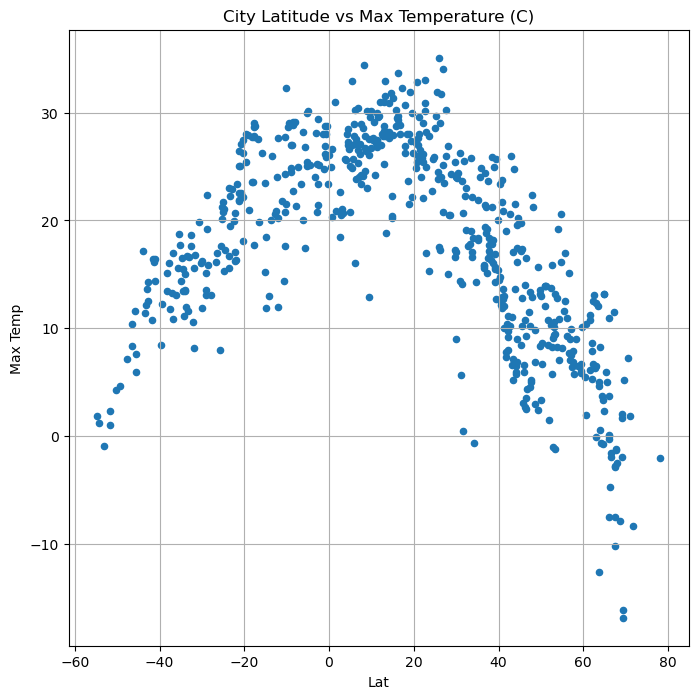

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", grid = True, figsize=(8,8), title = "City Latitude vs Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

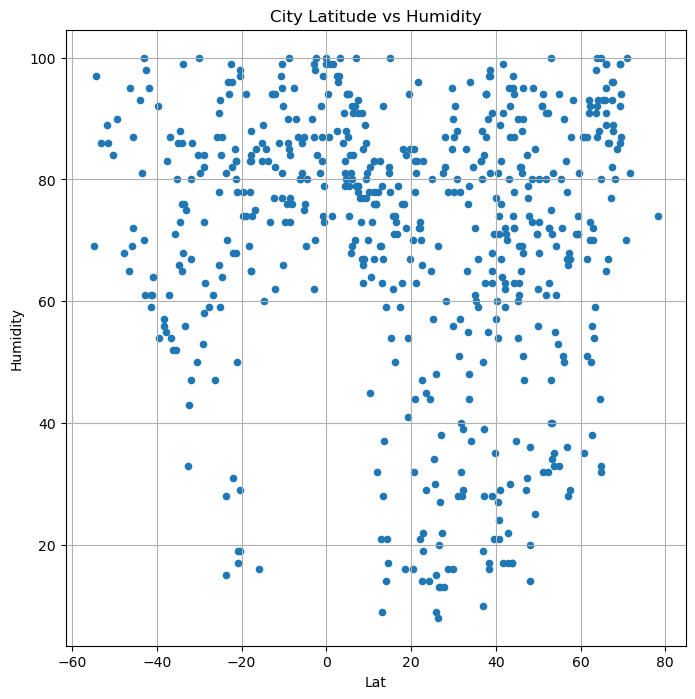

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", grid = True, figsize=(8,8), title = "City Latitude vs Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

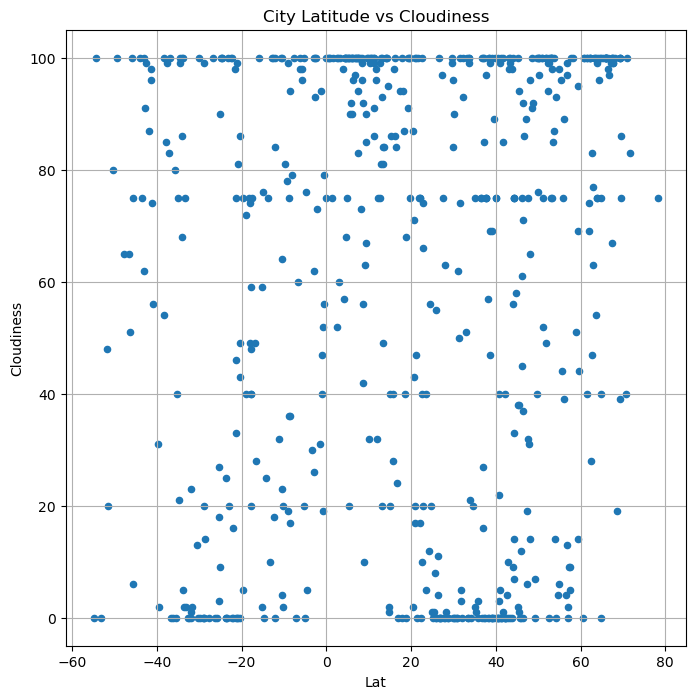

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid = True, figsize=(8,8), title = "City Latitude vs Cloudiness")


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

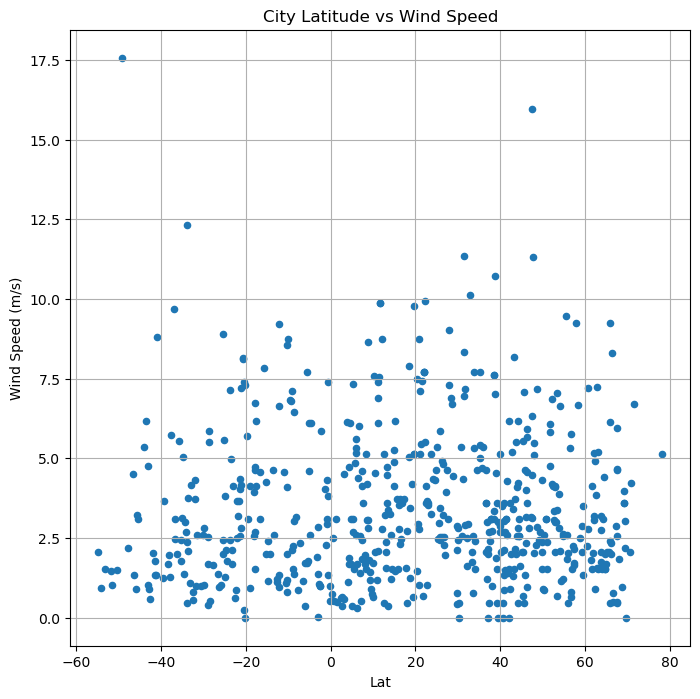

In [18]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid = True, figsize=(8,8), title = "City Latitude vs Wind Speed")


# Incorporate the other graph properties
plt.ylabel("Wind Speed (m/s)")
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define function for linear regression
def lin_regress(x,y, xlabel = "x", ylabel = "y"):   
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    mid_x = (min(x)+max(x))/2
    mid_y = (min(y)+max(y))/2
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(mid_x,mid_y),fontsize=15,color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.show()
    print(f"The r value is: {rvalue}")
    

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,aykhal,66.0000,111.5000,-7.50,89,100,9.26,RU,1683688138
7,yellowknife,62.4560,-114.3525,13.09,50,28,4.92,CA,1683688043
8,isafjordur,66.0755,-23.1240,3.73,95,100,1.99,IS,1683688482
10,imeko,7.4500,2.8500,24.22,93,83,1.83,NG,1683688498
13,tiksi,71.6872,128.8694,-8.34,81,83,6.71,RU,1683688498


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,13.62,70,62,4.75,AU,1683688135
1,puerto ayora,-0.7393,-90.3518,25.86,97,19,1.34,EC,1683688137
3,taltal,-25.4000,-70.4833,17.67,78,27,2.00,CL,1683688217
4,grytviken,-54.2811,-36.5092,1.17,97,100,0.93,GS,1683688149
5,port-aux-francais,-49.3500,70.2167,4.60,90,100,17.57,TF,1683688136


###  Temperature vs. Latitude Linear Regression Plot

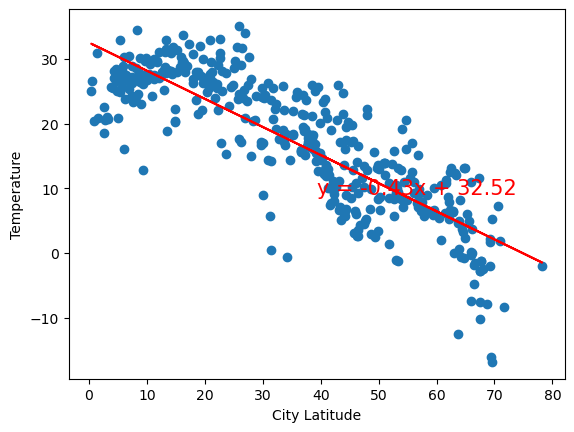

The r value is: -0.8370243787573316


In [22]:
# Linear regression on Northern Hemisphere
lin_regress(northern_hemi_df['Lat'],northern_hemi_df["Max Temp"], "City Latitude",  "Temperature")


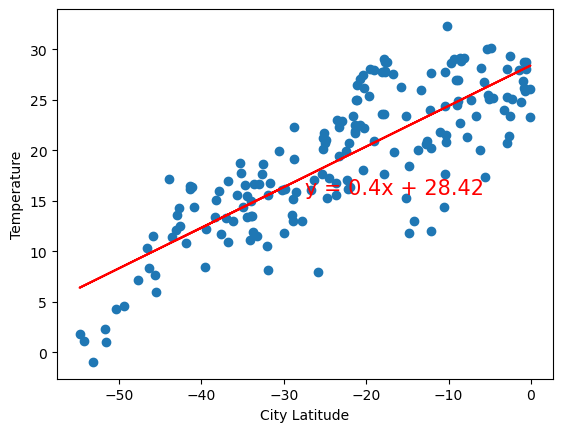

The r value is: 0.8140783604688361


In [23]:
# Linear regression on Southern Hemisphere
lin_regress(southern_hemi_df['Lat'],southern_hemi_df["Max Temp"], "City Latitude",  "Temperature")


**Discussion about the linear relationship:** 

There appears to be strong relationship between latitude and temperature. In the northern hemisphere, latitude and temperature are negatively correlated. In the southern hemisphere, latitude and temperature are positively correlated.

### Humidity vs. Latitude Linear Regression Plot

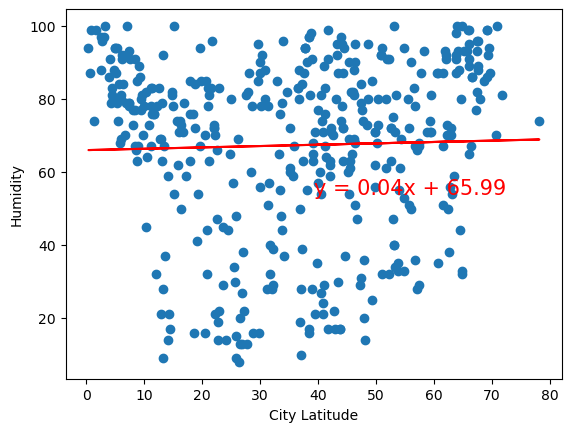

The r value is: 0.030235201106879064


In [24]:
# Northern Hemisphere
lin_regress(northern_hemi_df['Lat'],northern_hemi_df["Humidity"], "City Latitude",  "Humidity")


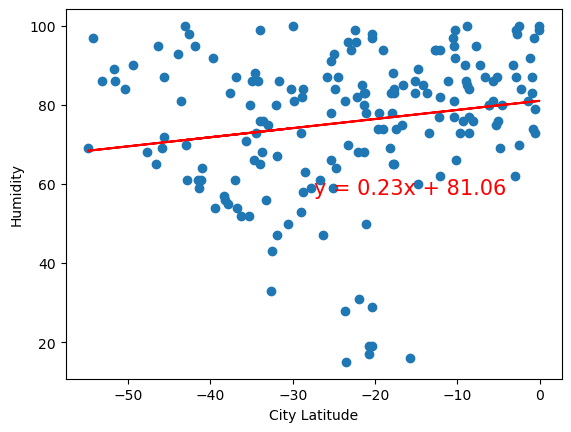

The r value is: 0.17949173355940035


In [25]:
# Southern Hemisphere
lin_regress(southern_hemi_df['Lat'],southern_hemi_df["Humidity"], "City Latitude",  "Humidity")


**Discussion about the linear relationship:**

There appears to be no relationship between latitude and humidity. Both r values are very small, implying weak to no relationship between the two variables.

### Cloudiness vs. Latitude Linear Regression Plot

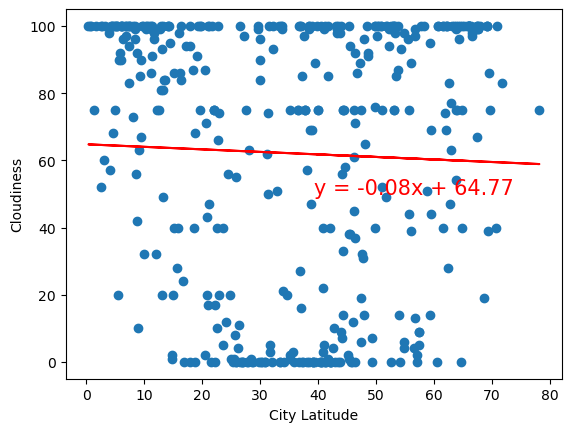

The r value is: -0.03729322514696086


In [26]:
# Northern Hemisphere
lin_regress(northern_hemi_df['Lat'],northern_hemi_df["Cloudiness"], "City Latitude",  "Cloudiness")


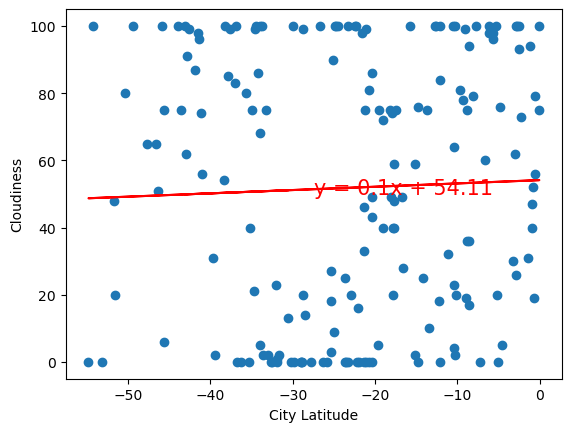

The r value is: 0.03585353801181391


In [27]:
# Southern Hemisphere
lin_regress(southern_hemi_df['Lat'],southern_hemi_df["Cloudiness"], "City Latitude",  "Cloudiness")


**Discussion about the linear relationship:** 
The r-values of both graphs are very small, which implies there is little to no relationship between latitude and cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

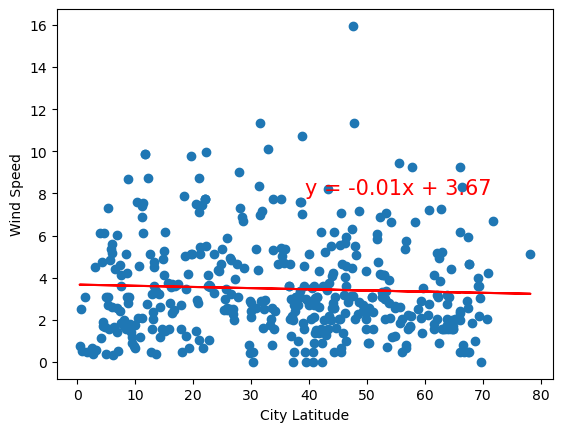

The r value is: -0.04640580440482044


In [28]:
# Northern Hemisphere
lin_regress(northern_hemi_df['Lat'],northern_hemi_df["Wind Speed"], "City Latitude",  "Wind Speed")


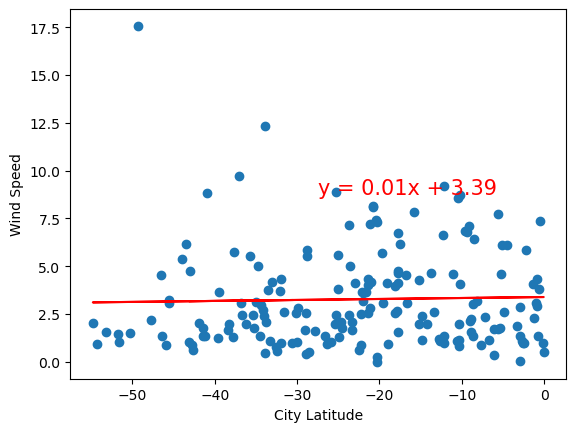

The r value is: 0.027811292891167367


In [29]:
# Southern Hemisphere
lin_regress(southern_hemi_df['Lat'],southern_hemi_df["Wind Speed"], "City Latitude",  "Wind Speed")


**Discussion about the linear relationship:** 

There appears to be no relationship between latitude and wind speed in the Northern Hemisphere and Southern Hemisphere due to the low r-value.